# Regression and Model Selection

In this notebook I will demonstrate my understanding of overfitting and underfitting using regression as an example. First I will generate a 1-dimensional feature space and an array of values for each row in the feature space. Then I will create regresion estimators based on linear regression (`x**1`) and polynomial regression (2nd, 4th and 6th degree, i.e. `x**2`, `x**4`  and `x**6`). I will show that the higher the polynomial, the better the fit for the train set, but the worse the fit for the test set. I will visually support my case.

I will re-use code from the [Python Data Science Handbook](http://bit.ly/2y3xzKw). To proof my understanding of the code I am re-using, I will comment on the code in my own words, both in MarkDown cells and in frequent code comment.

## 1. create test data

[your comment goes here]

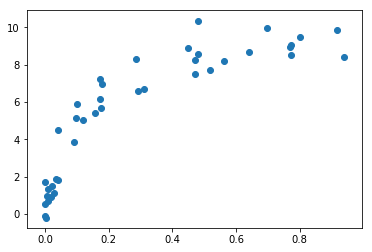

In [26]:
# your code goes here

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Data must not be classifiable, it has to be a numerical value

#Creates Random data (like in book) 
#What does rseed describe? It is not the range
def make_data(N, err=1.0, rseed=1): 
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

#Create a set of 40 numerical values with the method above
X, y = make_data(40)
plt.scatter(X, y)#visualizes data points

## 2. create the regression pipeline

[your comment goes here]

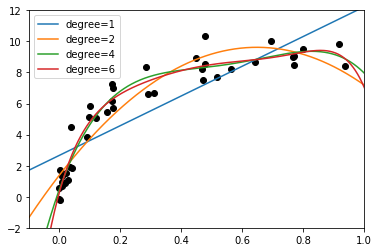

In [27]:
# your code goes here
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 2, 4, 6]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

## 3. show the regressors

[your comment goes here]

In [28]:
# your code goes here

## 4. show the validation curve

[your comment goes here]

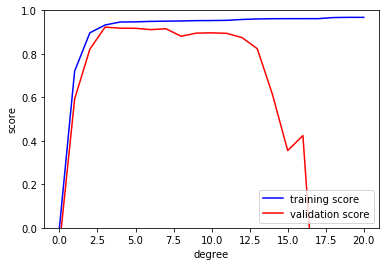

In [29]:
# your code goes here

from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

## 5. conduct grid search to find the optimal regressor

[your comment goes here]

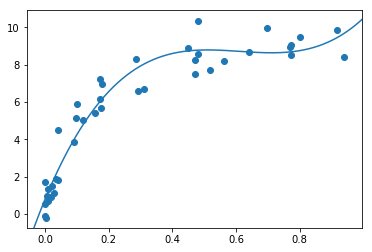

In [30]:
# your code goes here

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);